# Linear Regression with Python

## Linear Regression using Scikit-Learn

### What is linear regression?
Linear Regression attempts to find a relationship between a dependent variable and one or more explantory (or independent) variables. In case of simple linear regression where there is only one explanatory variable, linear regression is described as a general equation as shown below.

\begin{align}
y = b_0 + b_1x + \epsilon
\end{align}

where y is the dependent variable, x is the explanatory variable with coefficient b<sub>1</sub>, and b<sub>0</sub> is the intercept with the error term $\epsilon$.

For multiple linear regression, we have two or more explanatory variables so the equation. It is described as a general equation as shown below. 

\begin{align}
y = b_0 + b_1x_1 + ... + b_px_p + \epsilon 
\end{align}

where y is the dependent variable, x<sub>1</sub>...x<sub>p</sub> are the explanatory variables with regression coefficients b<sub>1</sub>...b<sub>p</sub>, and b<sub>0</sub> is the intercept with the error term $\epsilon$.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### About the dataset
This is a simulated dataset made for teaching regression containing 10 independent variables named **Feat01, Feat02..., Feat10** and a dependent variable called **Target**. 

### The task
The task at hand is to predict the **Target** variable such that the values of predictions are as close to the actual values as possible. This will be done using a baseline linear regression model.

In [2]:
# Loading data
data = pd.read_csv("data.csv")
data.head()

,Feat01,Feat02,Feat03,Feat04,Feat05,Feat06,Feat07,Feat08,Feat09,Feat10,Target
0,0,11617.463,135.935905,10960,491.597396,80.714963,0.675678,16.891946,0.506758,1.198996,137
1,0,1086607.005,1983.900611,13065,1391.028397,64.221576,0.880523,0.146754,0.146754,1.230974,335
2,0,37945.952,2726.252884,8772,222.952910,37.589307,0.325336,16.266790,0.488004,1.208015,172
3,0,79471.821,3448.065646,36414,883.345912,662.170505,0.257565,0.000000,0.128782,1.256901,867
4,1,5486.580,1509.753541,13040,742.253326,99.315014,0.129816,0.000000,0.129816,1.255410,815


In [3]:
X = data.drop(["Target"],axis=1) # Explanatory(independent) variables
y = data["Target"] # Dependent variable

### Train/test split
Data is divided into training and test set. Training set is used to train the linear model and test set is used evaluate the trained model. Here, we are using 70% data in the training set, leaving 30% data for the test set. The train-test set ratio is determined keeping in mind the size of data. Larger test sets (around 20-30% data) provide more reliable evaluation results but at the same time training set should be enough so that underfitting does not occur.  

In [4]:
# A 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100,
                                                    shuffle=True)

### Training a linear regression model
We will train a linear regression model using all ten available features. The `fit` method of the `LinearRegression()` class trains models and estimates the best possible intercept and coefficient(s). 

In [5]:
# Fitting a linear model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# The coefficients for the given features
model_coefs = pd.DataFrame({'Feature/Column': list(X.columns), 'Coefficient': model.coef_})
model_coefs

,Feature/Column,Coefficient
0,Feat01,2.319425
1,Feat02,0.000010
2,Feat03,0.006078
3,Feat04,0.001139
4,Feat05,0.013329
5,Feat06,0.111174
6,Feat07,0.511887
7,Feat08,-0.123155
8,Feat09,-16.116907
9,Feat10,11177.060571


Looking at the value of coefficients, we can say that for this model, the feature Feat02 is not a good predictor and can be removed without affecting the results.

In [7]:
# The model's intercept
model.intercept_

-13397.877366112254

### Taking predictions
We can use `predict` method to take predictions of the test set.

In [8]:
# Taking predictions for the test set
y_pred = model.predict(X_test)

### Model Evaluation
We will be evaluating the model now. We will start by using the metrics R-squared score and RMSE.

**R-squared score** - This score varies from 0 to 1 and represents the proportion of variance of the dependent variable explained by the independent variable(s). It conveys the extent to which the variance of one variable explains the variance of the other. The ideal score is 1.0 which conveys that 100% of the variance of the dependent variable is explained by the independent variables.

In [9]:
print("The R-squared score is {:.4f}".format(r2_score(y_test,y_pred)))

The R-squared score is 0.8978


The model used above explains only 89.78% variance of the dependent variable. This can be improved using more data and better features.

**Root Mean Squared Error(RMSE)** - RMSE is the standard deviation of the residuals (prediction errors). It measures the spread of the data around the line of best fit. RMSE is always non-negative with a value of 0 being ideal. A lower RMSE is better than a higher one. RMSE of two different datasets should not be compared as this measure is dependent on the scales of the data.

\begin{align}
RMSE = \sqrt{\frac{\sum_{i=1}^n \left(\hat{y_i} - y_i \right)^2}{n}}
\end{align}

Here, $\hat{y}$ is the predicted value and y is the observed value. n is the number of rows in the dataset. 

In [10]:
print("The Root Mean Squared error is {:.4f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

The Root Mean Squared error is 82.8497


Without comparing with other models, we can't infer much using the RMSE value as it is relative to the independent and dependent variables of the simulated dataset. 
 
**Residuals** are prediction errors i.e., difference between the observed value and the predicted value.

\begin{align}
e = y - \hat{y}
\end{align}

Residuals are used in various performance metrics and can be used to visualize model performance. Below is a residuals plot. A resdiuals plot shows residuals on the vertical axis and predicted values on the horizontal axis. In a ideal residuals plot, the distribution of residuals around the target is random and unifiorm centered around zero. A good model leads to constant variability in the residuals plot.

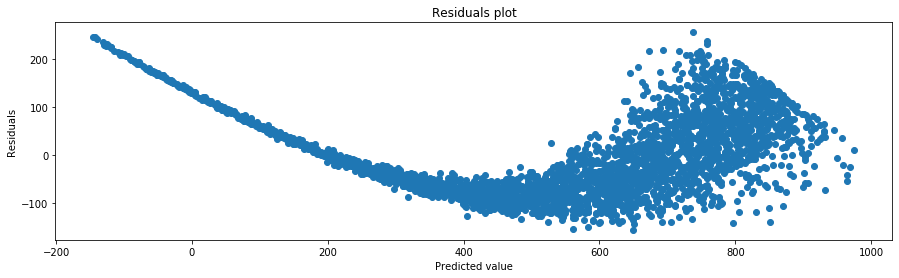

In [11]:
# Residuals plot(overall)
plt.figure(figsize=(15,4))
plt.scatter(y_pred,y_test-y_pred)
plt.title("Residuals plot")
plt.xlabel("Predicted value")
plt.ylabel("Residuals")
plt.show()

The residuals plot above is not randomly or uniformly distributed. In fact, there are some predictions with negative values which is not possible as the dependent variable(bike count) can't be negative. The histogram below also depicts that the error is not normally distributed around zero and right-skewed. We need a better model as this is not a good fit.

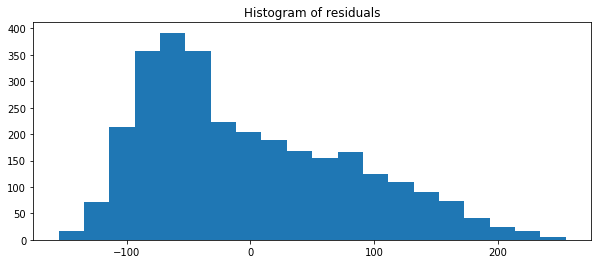

In [12]:
plt.figure(figsize=(10,4))
plt.hist(y_test-y_pred, bins= 20)
plt.title("Histogram of residuals")
plt.show()

**QQ-plot** is formed when quantiles of two variables are plotted against each other. Ideally, all points should lie on or close to the straight line at an angle of 45&deg;.

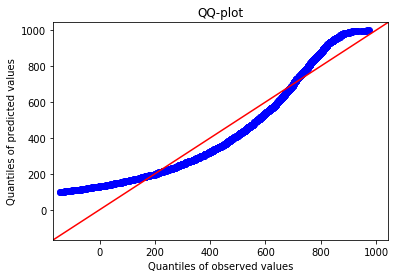

In [13]:
## Normal QQ-plot
qqplot_2samples(y_test,y_pred,line='45')
plt.title("QQ-plot")
plt.xlabel("Quantiles of observed values")
plt.ylabel("Quantiles of predicted values")
plt.show()

Clearly, only few points lie close to the 45&deg; line. For half the quantiles, x quantiles are lower than y quantiles and vice-versa. A model with a better fit is needed.

**Conclusion:** The baseline model that includes all eligible variables is not a good fit. More data and better feature selection strategy might improve the model performance.